# Bike Sharing Linear Regression Assignment

## Problem statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1:- Reading and Understanding the Data

First we filter the warnings
Then we will import NumPy, Pandas, Matplotlib and seaborn for analysing the data and for visualisation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### importing the data file 
boombike = pd.read_csv(r'C:\Users\rajee\OneDrive\Desktop\Upgrad ML & AI Course\1. Main course\7. ML Linear Regression\Bike sharing case study\day.csv')


In [4]:
### reading the data

boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### from the above, it seems that most of the data variables are numerical only. Although some of the variables (like holiday, week day, weathersit, mnth, yr, season) seem to have been converted to numerical values from the string
### checked the data dictionary provided with data, to understans the variable types

In [5]:
### checking more information of data
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
boombike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
boombike.shape

(730, 16)

In [8]:
boombike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [9]:
### checking for duplicate entries
boombike_dp=boombike.copy()
boombike_dp.drop_duplicates(subset=None,inplace=True)
boombike_dp.shape

(730, 16)

### following are the main characteristics of data, found from the above data reading
- the dataset has total of 730 entries and has total of 16 columns or variables
- luckily, None of the entries have null values and niether any is missing
- All the columns, except "dteday" are either integer or float
- "dteday" column is an object or date format entry
- The dataset seems to be consistent at head and tail and no shifting of data entries witnessed
- Many of the objcet type column variables were changed to integer tyoe, as confirmed from data dictionary and need to accessed at later stage, that whether, we need to change them back to string or let them remain as integer/float
- there are no duplicate entries in rows, as the shape after removing anticipated duplicates is same as original shape




 ## Step 2:- Data Cleaning
 
 ### 2(a) Drop the non relevant columns (not required for analysis)
    
    

### the 1st column "instant" is just for indexing purpose and has no role in analysis
### the 2nd column "dteday" is just the date of data entry. it is in sequence, starting from 1st Jnuary 2018 to 31st december 2019, with a total of 2 years (730 entries) data. It has no significance in analysis, as other attributes of months, days, holiday etc. are already available in the dataset, which are the real important ones for analysis
### the columns "casual" and "registered" are not relevant, as the column "cnt" is our target variable for regressin analysis, which is the sum of the other 2 column entries
### It does not matter, whether customer is a casual user or a registered user. we are interested in daily count of customers who used boombikes and the variables affecting this count



In [10]:
### Removing the above mentioned columns

boombike=boombike.drop(['instant','dteday','casual','registered'], axis =1)

In [11]:
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
### Checking for correlation between 'temp' and 'atemp' variables
### also, checking correlation between other variables

boombike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [13]:
### 'temp' and 'atemp' are both very strongly correlated with coefficient ~1. hence we can remove 'temp'. 'atemp' is the temperature which customer feels outside and hence should be more likely to be deciding criteria. anyways both variables have very close values with strong correlation
### it is to be noted that 'hum' does not have significant correlation with 'temp','atemp' or 'windspeed'

### dropping 'temp'

boombike=boombike.drop('temp',axis=1)
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


<Figure size 1800x1296 with 0 Axes>

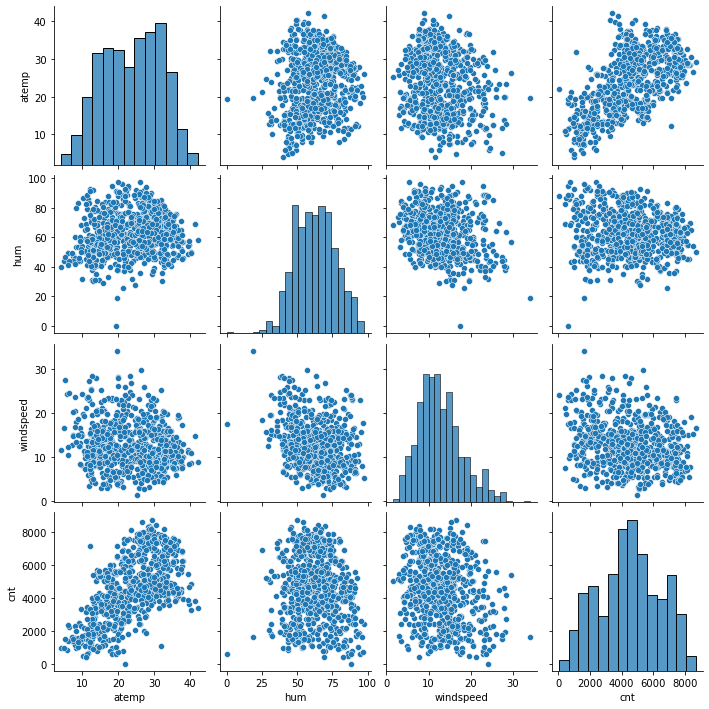

In [14]:
### STEP 3 :- Analysing and visualizing the train dataset

#### Creating pairplots for numerical variables

plt.figure(figsize=(25,18))
sns.pairplot(boombike[['atemp','hum','windspeed','cnt']])
plt.show()

### from the above pairplots following are the main observations
- atemp seems to have a +ve correlation with target variable cnt
- windspeed seems to have a negative correlation with target variable cnt

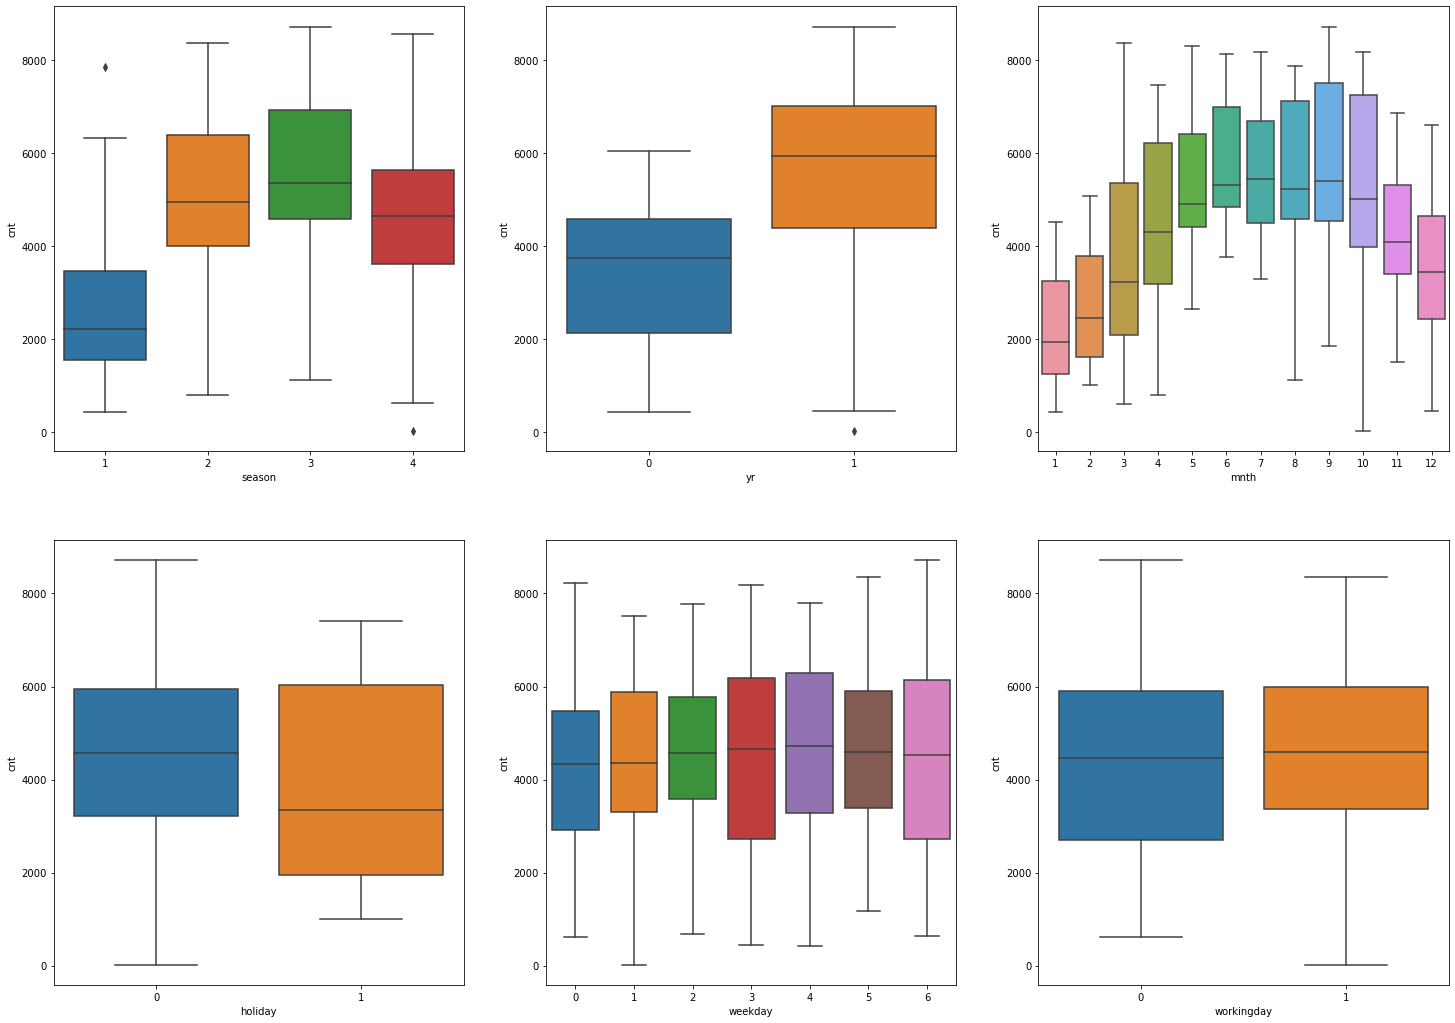

In [15]:
### Now visualising categorical dataset wit boxplots

plt.figure(figsize=(25,18))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data = boombike)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data = boombike)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data = boombike)
plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data = boombike)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data = boombike)
plt.subplot(2,3,6)
sns.boxplot(x='workingday',y='cnt',data = boombike)
plt.show()

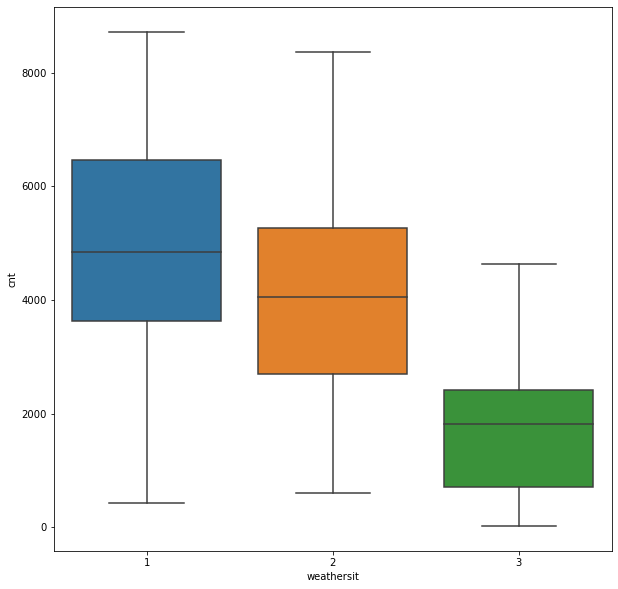

In [16]:
### Now visualising categorical variable weathersit wit boxplot

plt.figure(figsize=(10,10))
sns.boxplot(x='weathersit',y='cnt',data = boombike)
plt.show()

### Important observations from above boxplots of categorical variables
- season 2(summer) & season 3 (fall) have higher bike bookings. season 1(spring) has the least
- There is a considerable increase in bike bookings from year 2018 to year 2019. Hence, the demand is expected to increase on year by year
- Months 6 to 9 are having most consistent bike bookings, with a median of above 5000 bookings
- Less bookings are observed on holidays, as was expected
- weekdays seem not to have any strong relationship with bookings
- working days are having more consistent and slightly higher bookings than non-working days

In [17]:
### Converting the variables to category dtype, in order to create dummy variables from them
boombike['season']=boombike['season'].astype('category')
boombike['mnth']=boombike['mnth'].astype('category')
boombike['weekday']=boombike['weekday'].astype('category')
boombike['weathersit']=boombike['weathersit'].astype('category')

In [18]:
### checking whether the dtype for selected variables got converted to category or not
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   atemp       730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [19]:
### Now we will create dummy variables for categorical variables and drop 1st column from the created list of dummy variables for each categorical variable.

boombike=pd.get_dummies(boombike, drop_first=True)
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

## STEP 4 :- Preparing or Spilitting the data for Linear regression
- we will split the data to Train and Test with 70:30 ratio
- We will use train_test_split method from sklearn package for this

In [20]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(boombike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
### Now checkinh the data shape and info after split

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   atemp         510 non-null    float64
 4   hum           510 non-null    float64
 5   windspeed     510 non-null    float64
 6   cnt           510 non-null    int64  
 7   season_2      510 non-null    uint8  
 8   season_3      510 non-null    uint8  
 9   season_4      510 non-null    uint8  
 10  mnth_2        510 non-null    uint8  
 11  mnth_3        510 non-null    uint8  
 12  mnth_4        510 non-null    uint8  
 13  mnth_5        510 non-null    uint8  
 14  mnth_6        510 non-null    uint8  
 15  mnth_7        510 non-null    uint8  
 16  mnth_8        510 non-null    uint8  
 17  mnth_9        510 non-null    uint8  
 18  mnth_10       510 non-null   

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   atemp         219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   cnt           219 non-null    int64  
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [23]:
### Scaling the data using minmax scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [24]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,11.5850,48.3333,23.500518,1796,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [25]:
# Apply scaler() to all the columns except the 'weathersit' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
scaler=MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [26]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [27]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


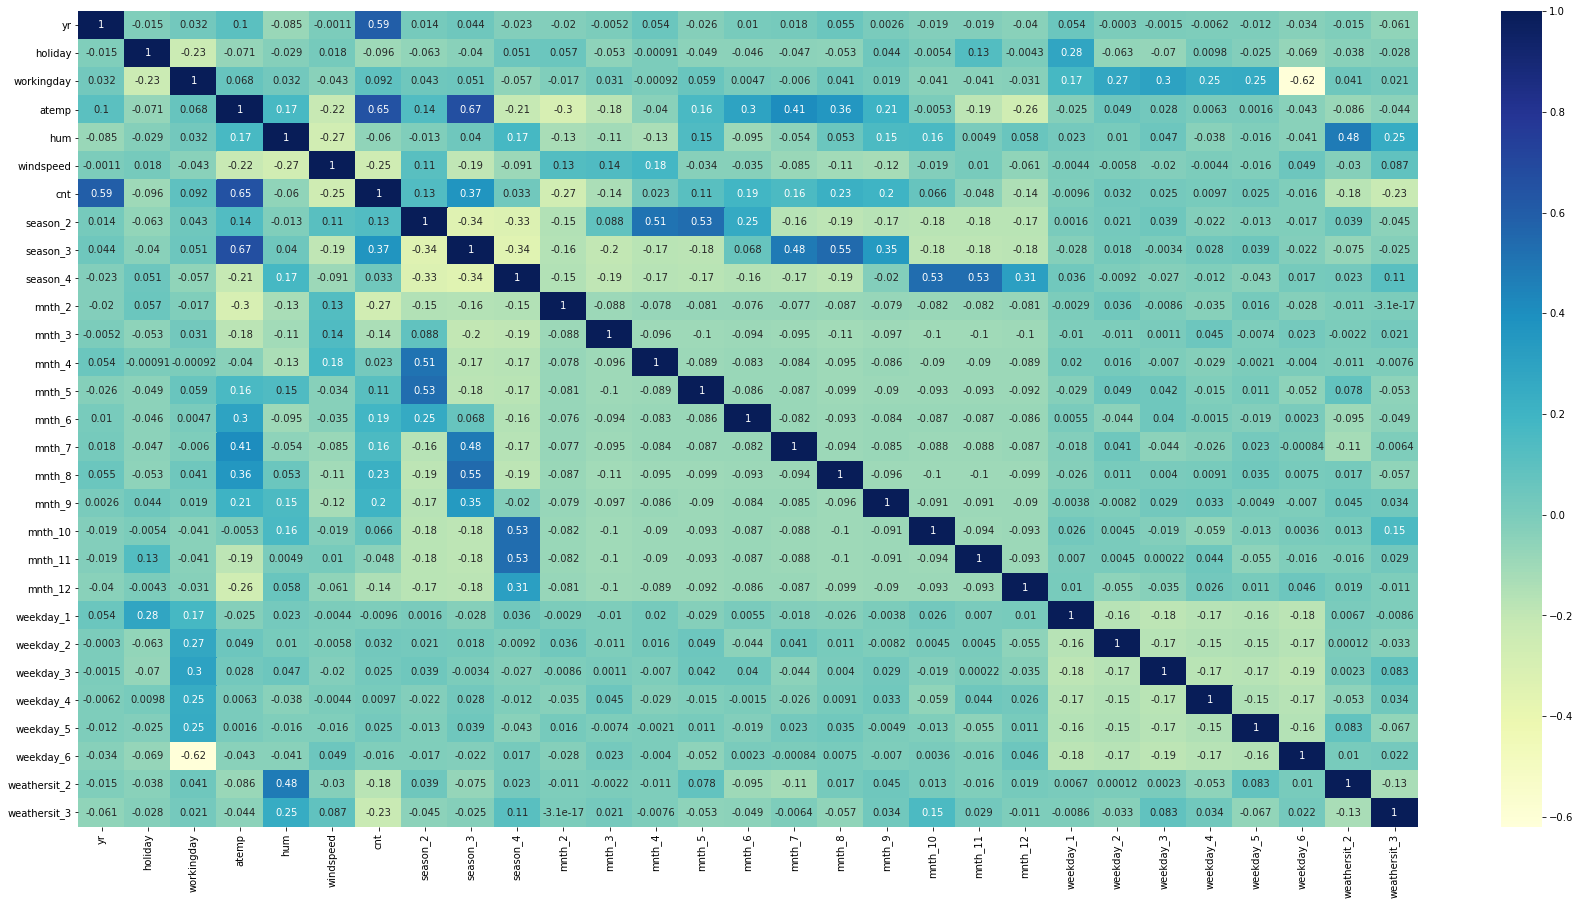

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(),annot=True, cmap="YlGnBu")
plt.show()

### Some of the Important observations from above correlation heatmap is as below
- yr has strong correlation with cnt
- 'atemp' has a very strong correlation with target variable 'cnt'
- windspeed has a fair negative correlation with target variable
- weather situation has a strong negative correlation with target variable
- weathersit2 & weathersit3 has good negative correlation with target variable


## STEP 5 :- Building the Linear Model

### dividing the training data into X & y sets for modelling


In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

### We will be Using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

## RFE (Recursive Feature elimination)


In [30]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
### Running RFE with the output number of the variable equal to 14

lm = LinearRegression()
lm.fit(X_train, y_train)

### running RFE

rfe = RFE(lm, 14)             
rfe = rfe.fit(X_train, y_train)

In [32]:
### getting the list of important features for modelling from RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 4),
 ('mnth_4', False, 6),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [33]:
### checking the selected columns

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [34]:
### checking the non selected columns

X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

## Building further regression model with STATSMODEL for detailed statistics


In [35]:
### # Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [36]:
### Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
### Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [38]:
### Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.0
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          8.61e-187
Time:                        18:36:32   Log-Likelihood:                 506.23
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     495   BIC:                            -918.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2346      0.028      8.529   

In [39]:
### weekday_6 is not significant and hence we can remove it
X_train_new = X_train_rfe.drop(["weekday_6"], axis = 1)

In [40]:
### Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [41]:
### Running the linear model

lm = sm.OLS(y_train,X_train_new).fit() 

In [42]:
### Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          1.68e-187
Time:                        18:36:32   Log-Likelihood:                 505.16
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     496   BIC:                            -923.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2388      0.027      8.724   

### No change in adjusted R^2 after removing weekday_6, hence correctly removed

In [43]:
### Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.03
7,season_3,5.65
3,atemp,3.42
6,season_2,2.55
8,season_4,2.18
4,hum,1.91
9,mnth_8,1.68
12,weathersit_2,1.56
11,mnth_10,1.52
10,mnth_9,1.40


In [44]:
### Based on the high VIF and High P value, season_3 is to be removed

X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [45]:
### Rebuilding the model without weekday_6

### Adding a constant variable

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [46]:
### Running the linear model

lm = sm.OLS(y_train,X_train_new).fit() 

In [47]:
### Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          1.29e-187
Time:                        18:36:32   Log-Likelihood:                 502.64
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     497   BIC:                            -924.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.027      8.648   

### No significant change in adjusted R^2 after removing season_3, hence correctly removed

In [48]:
### Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.01
4,hum,1.87
7,season_4,1.71
3,atemp,1.56
11,weathersit_2,1.56
10,mnth_10,1.49
8,mnth_8,1.42
6,season_2,1.39
12,weathersit_3,1.25
9,mnth_9,1.24


In [49]:
### Based on the High P value, mnth_10 is to be removed

X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [50]:
### Rebuilding the model without mnth_10

### Adding a constant variable

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [51]:
### Running the linear model

lm = sm.OLS(y_train,X_train_new).fit()

In [52]:
### Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.5
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          9.34e-188
Time:                        18:36:32   Log-Likelihood:                 500.14
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     498   BIC:                            -925.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2301      0.027      8.407   

### No significant change in adjusted R^2 after removing mnth_10, hence correctly removed

In [53]:
### Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.31
4,hum,1.87
10,weathersit_2,1.56
3,atemp,1.51
8,mnth_8,1.41
6,season_2,1.38
7,season_4,1.31
11,weathersit_3,1.24
9,mnth_9,1.21
5,windspeed,1.19


## Now the model looks good with all significant variables and no significant multicollinearity among variables
### High VIF of const is to be ignored, as it is not an independent variable. However, as it is significant, we will keep it


In [54]:
### checking the parameters of different variables achieved through model

lm.params

const           0.230125
yr              0.229362
holiday        -0.092356
atemp           0.561645
hum            -0.180129
windspeed      -0.165463
season_2        0.100612
season_4        0.142263
mnth_8          0.069456
mnth_9          0.126896
weathersit_2   -0.054734
weathersit_3   -0.227859
dtype: float64

In [55]:
### the final summary of our linear model is
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.5
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          9.34e-188
Time:                        18:36:32   Log-Likelihood:                 500.14
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     498   BIC:                            -925.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2301      0.027      8.407   

## STEP 6 :- Residual Analysis of the Train data

In [56]:
### we will check that error terms are normally distributed with mean 0 or not
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

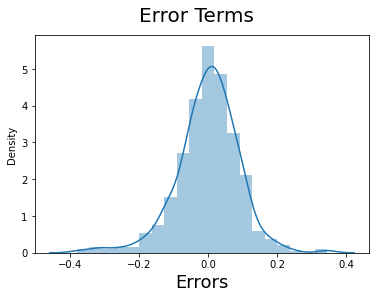

In [57]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## STEP 6 :- Prediction using built Model

In [58]:
### applying the scaling on the test set
num_vars = ['atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [59]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [60]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
### Now dividing test data into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   atemp         219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   season_3      219 non-null    uint8  
 8   season_4      219 non-null    uint8  
 9   mnth_2        219 non-null    uint8  
 10  mnth_3        219 non-null    uint8  
 11  mnth_4        219 non-null    uint8  
 12  mnth_5        219 non-null    uint8  
 13  mnth_6        219 non-null    uint8  
 14  mnth_7        219 non-null    uint8  
 15  mnth_8        219 non-null    uint8  
 16  mnth_9        219 non-null    uint8  
 17  mnth_10       219 non-null    uint8  
 18  mnth_11       219 non-null   

In [62]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test_lm=X_test_lm[col1]

In [63]:
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   atemp         219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   season_4      219 non-null    uint8  
 8   mnth_8        219 non-null    uint8  
 9   mnth_9        219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [64]:
# Making predictions using the final model (lm)

y_pred = lm.predict(X_test_lm)

## STEP 7 :- Model Evaluation

### Now we will plot graph for actual vs predicted values

Text(0, 0.5, 'y_pred')

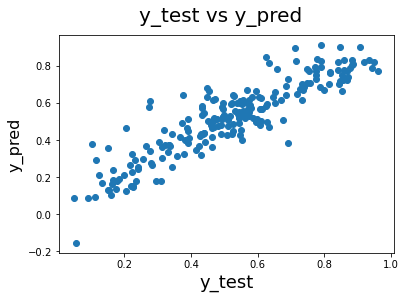

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

## R^2 score for the test set

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8067761626015646

In [67]:
### Now, we can calculate adjusted R^2 from the formula (no. of variables selected in modelling is known to us)
# n is number of rows in X
# Number of predictors (p) is the shape along axis 1
n = X_test.shape[0]
p = X_test.shape[1]
r2=0.8067761626015646                 # from above r2score

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print(adjusted_r2)

0.7783010707744268


### Comparison of Train & Test 

- Train R^2 :0.836
- Train Adjusted R^2 :0.833 
- Test R^2 :0.807
- Test Adjusted R^2 :0.778 
- This is a fairly good model that can very well 'Generalize' the prediction to various datasets.

In [68]:
## Business Guidelines/Suggestions from the model

The top 3 predictor variables that influences the bike booking are: 
- **apparent temperature (atemp)** - A coefficient value of ‘0.5616’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5616 units. 
- **Year (yr)** - A coefficient value of ‘0.2294’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2294 units.
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.2279’ indicated that a unit increase in Weathersit_3 variable decreases the bike hire numbers by 0.2279 units.
 

#### the above variables are the most important to look into, when planning for increasing the bike hiring trend

The next best features that can also be considered are 
- **hum:** - A coefficient value of ‘-0.1801’ indicated that a unit increase in hum variable decreases the bike hire numbers by 0.1801 units. 
- **windspeed:** - A coefficient value of ‘-0.1655’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1655 units. 


SyntaxError: invalid syntax (<ipython-input-68-e748905204da>, line 3)